Biblioteki

In [1]:
#preprocesing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#modele
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

#metryki
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error


#inne
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV

#patch dla scikit-learn
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Skalowanie itd danych

In [4]:

df_final =pd.read_csv('finale.csv')
df_final.columns=['cena', 'cena_metr', 'adres', 'metraz', 'l_pok', 'czynsz', 'dostepnosc',
       'rok_budowy', 'pietromieszk', 'ilepieter', 'balkon', 'ogrodek', 'taras',
       'internet', 'telefon', 'telewizjakablowa', 'domofonwideofon',
       'drzwioknaantywlamaniowe', 'monitoringochrona', 'roletyantywlamaniowe',
       'systemalarmowy', 'terenzamkniety', 'kuchenka', 'lodowka', 'meble',
       'piekarnik', 'pralka', 'telewizor', 'zmywarka', 'dwupoziomowe',
       'oddzielnakuchnia', 'piwnica', 'pomuzytkowe', 'latitude', 'longitude',
       'forma_wlasnosci_pelna_wlasnosc',
       'forma_wlasnosci_spoldzielcze_wl_z_KW',
       'forma_wlasnosci_spoldzielcze_wlasnosciowe', 'forma_wlasnosci_udzial',
       'stan_do_remontu', 'stan_do_wykonczenia', 'stan_do_zamieszkania',
       'miejsce_parkingowe_garaz', 'ogrzewanie_miejskie',
       'ogrzewanie_kotlownia', 'ogrzewanie_gazowe', 'ogrzewanie_inne',
       'ogrzewanie_elektryczne', 'ogrzewanie_piec_kaflowy', 'rynek_pierwotny',
       'ogloszeniodawca_biuro_nieruchomosci', 'ogloszeniodawca_deweloper',
       'ogloszeniodawca_prywatny', 'rodzaj_zabudowy_apartamentowiec',
       'rodzaj_zabudowy_blok', 'rodzaj_zabudowy_dom_wolnostojacy',
       'rodzaj_zabudowy_kamienica', 'rodzaj_zabudowy_loft',
       'rodzaj_zabudowy_plomba', 'rodzaj_zabudowy_szeregowiec',
       'okna_aluminiowe', 'okna_drewniane', 'okna_plastikowe', 'winda_tak',
       'material_beton', 'material_beton_komorkowy', 'material_cegla',
       'material_drewno', 'material_keramzyt', 'material_silikat',
       'material_wielka_plyta', 'material_zelbet']
df_final=df_final[['cena',  'metraz', 'l_pok', 'czynsz', 
       'rok_budowy', 'pietromieszk', 'ilepieter', 'balkon', 'ogrodek', 'taras',
       'internet', 'telefon', 'telewizjakablowa', 'domofonwideofon',
       'drzwioknaantywlamaniowe', 'monitoringochrona', 'roletyantywlamaniowe',
       'systemalarmowy', 'terenzamkniety', 'kuchenka', 'lodowka', 'meble',
       'piekarnik', 'pralka', 'telewizor', 'zmywarka', 'dwupoziomowe',
       'oddzielnakuchnia', 'piwnica', 'pomuzytkowe', 'latitude', 'longitude',
       'forma_wlasnosci_pelna_wlasnosc',
       'forma_wlasnosci_spoldzielcze_wl_z_KW',
       'forma_wlasnosci_spoldzielcze_wlasnosciowe', 'forma_wlasnosci_udzial',
       'stan_do_remontu', 'stan_do_wykonczenia', 'stan_do_zamieszkania',
       'miejsce_parkingowe_garaz', 'ogrzewanie_miejskie',
       'ogrzewanie_kotlownia', 'ogrzewanie_gazowe', 'ogrzewanie_inne',
       'ogrzewanie_elektryczne', 'ogrzewanie_piec_kaflowy', 'rynek_pierwotny',
       'ogloszeniodawca_biuro_nieruchomosci', 'ogloszeniodawca_deweloper',
       'ogloszeniodawca_prywatny', 'rodzaj_zabudowy_apartamentowiec',
       'rodzaj_zabudowy_blok', 'rodzaj_zabudowy_dom_wolnostojacy',
       'rodzaj_zabudowy_kamienica', 'rodzaj_zabudowy_loft',
       'rodzaj_zabudowy_plomba', 'rodzaj_zabudowy_szeregowiec',
       'okna_aluminiowe', 'okna_drewniane', 'okna_plastikowe', 'winda_tak',
       'material_beton', 'material_beton_komorkowy', 'material_cegla',
       'material_drewno', 'material_keramzyt', 'material_silikat',
       'material_wielka_plyta', 'material_zelbet']]
import scipy.stats as stats
z = np.abs(stats.zscore(df_final.cena))
df_final = df_final[z<3]
df_final.cena=np.log(df_final.cena)

In [5]:

y = df_final["cena"]
X_standard = df_final[['metraz', 'l_pok',     'czynsz',  'pietromieszk', 'ilepieter']].copy()
X_categor = df_final.drop(['cena','metraz', 'l_pok',     'czynsz', 'pietromieszk', 'ilepieter'], axis = 1)
cols = X_standard.columns
index = X_standard.index
transformer = StandardScaler().fit(X_standard)
X_standard = transformer.transform(X_standard)
X_standard = pd.DataFrame(X_standard, columns = cols, index = index)
X = pd.concat([X_standard, X_categor], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

Wybranie modelu

LR: 0.317222 (0.178052); MSE: 148854.633995
MLP: -1.798811 (1.668429); MSE: 668209.398612
KNN: 0.536258 (0.006200); MSE: 127954.097949
CART: 0.701479 (0.008508); MSE: 91340.722649
SVR: 0.056310 (0.005422); MSE: 187842.247455
RF: 0.855221 (0.003792); MSE: 64928.962200
XGB: 0.776639 (0.006831); MSE: 89002.764338
BagR: 0.837644 (0.003620); MSE: 69087.371713
ETR: 0.807510 (0.004609); MSE: 77887.342454


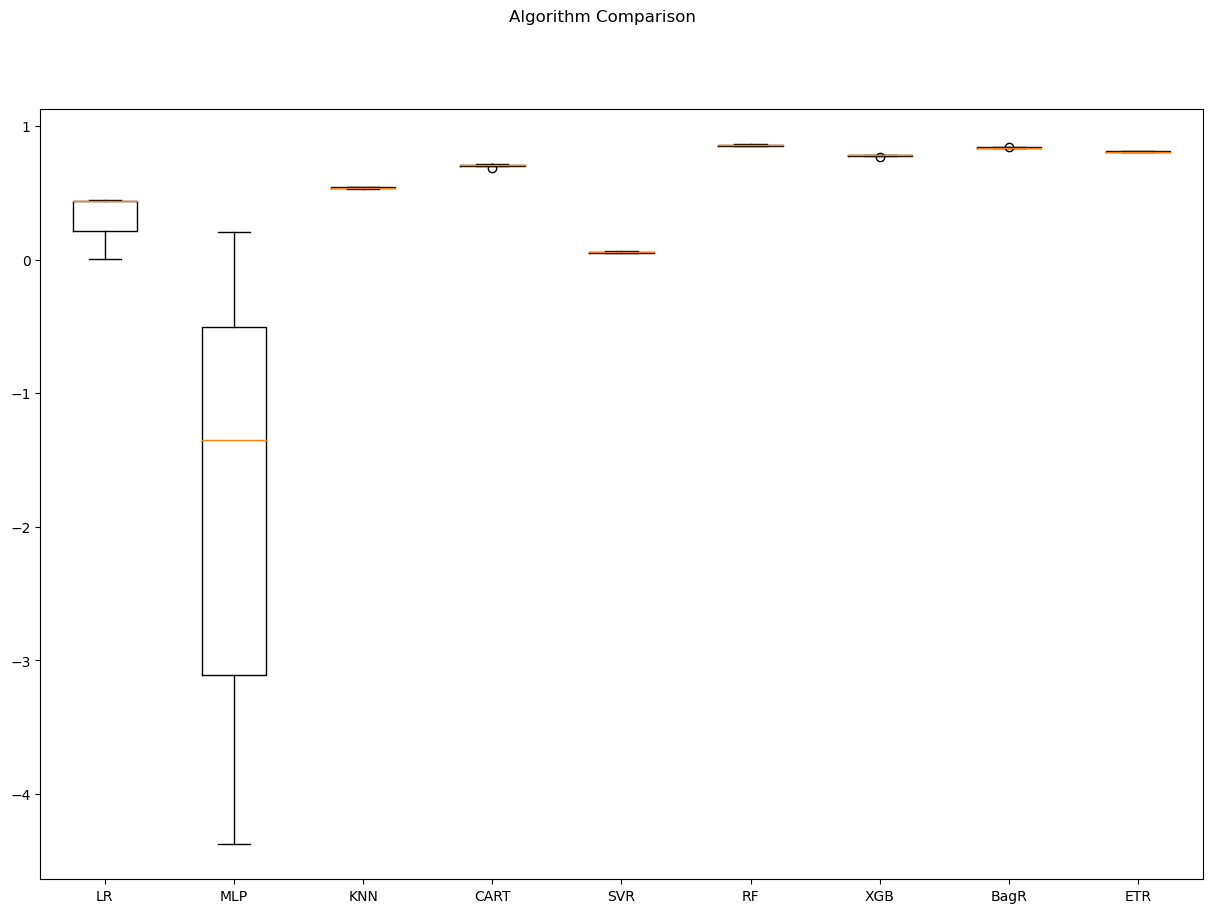

3322

In [13]:
models = []
models.append(('LR', LinearRegression()))
models.append(('MLP', MLPRegressor(random_state = 12345)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state = 12345)))
models.append(('SVR', SVR()))
models.append(('RF', RandomForestRegressor(random_state = 12345)))
models.append(('XGB', GradientBoostingRegressor(random_state = 12345)))
models.append(('BagR', BaggingRegressor(random_state = 12345)))
models.append(( 'ETR',ExtraTreesRegressor(random_state = 12345)))

results = []
names = []


for name, model in models:
           
        cv_results = cross_val_score(model, X_train, y_train, cv = 6,n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        msg = "%s: %f (%f); MSE: %f" % (name, cv_results.mean(), cv_results.std(), mean_absolute_error(np.exp(y_test),np.exp(pred)))
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
gc.collect()

# Random Forest

In [6]:
rf_params = {"n_estimators" :[500,1000,1500,2000], 
             "max_features": [7,14,21,28,35,42], 
             "min_samples_split": [2,3,4,5,8,15],
            "max_depth": [7,15,21]}
rf_model = RandomForestRegressor(random_state = 12345)
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    n_jobs=1,
                    verbose = 3).fit(X_train, y_train)
rf_tuned = RandomForestRegressor(**gs_cv.best_params_,random_state=12345)
rf_tuned = rf_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=500;, score=0.550 total time=   7.4s
[CV 2/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=500;, score=0.542 total time=   7.4s
[CV 3/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=500;, score=0.539 total time=   7.2s
[CV 4/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=500;, score=0.547 total time=   7.2s
[CV 5/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=500;, score=0.552 total time=   7.2s
[CV 1/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=1000;, score=0.550 total time=  14.3s
[CV 2/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=1000;, score=0.543 total time=  14.4s
[CV 3/5] END max_depth=7, max_features=7, min_samples_split=2, n_estimators=1000;, score=0.539 total time=  14.5s
[CV 4/5] END max_depth=7, max

['rf_tuned.pkl']

In [7]:
joblib.dump(rf_tuned,'rf_tuned_out_log.pkl')

['rf_tuned_out_log.pkl']

In [2]:
rf_tuned=joblib.load('rf_tuned_out_log.pkl')

In [11]:
y_pred = rf_tuned.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(np.exp(y_test), np.exp(y_pred))))
print ('Variance explained : {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))

mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print ('MAE: {}'.format(mae))
cv_results = cross_val_score(rf_tuned, X_test, y_test, cv = 10)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(rf_tuned, X_test, y_test, cv = 5)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.9429433828749484
Variance explained : 0.9437747788463987
MAE: 34154.19079563013
 0.813074 (0.017963)
 0.808399 (0.015418)


In [12]:
dic={"test":y_test,'pred':np.round(y_pred,2)}
out=pd.DataFrame(dic)
out_sort=out.loc[::100].sort_values(by='test')
out_sort_test=out_sort.test
out_sort_index=out_sort.index


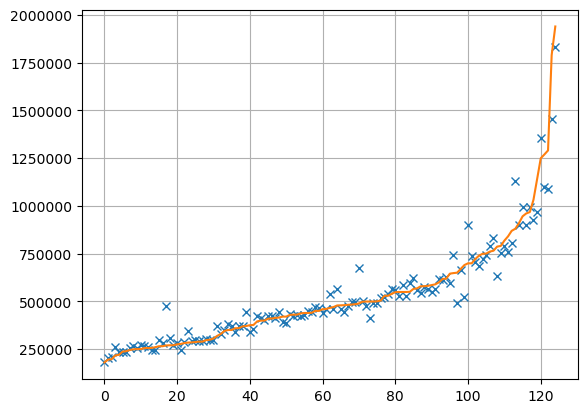

In [13]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),np.exp(out_sort.pred),'x')
plt.plot(range(len(out_sort_test)),np.exp(out_sort_test),'-')
plt.grid()


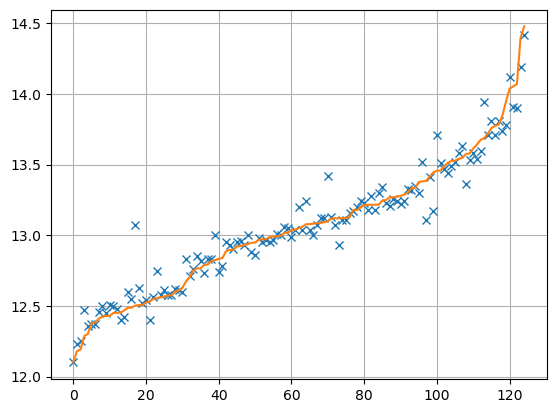

In [14]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),out_sort.pred,'x')
plt.plot(range(len(out_sort_test)),out_sort_test,'-')
plt.grid()


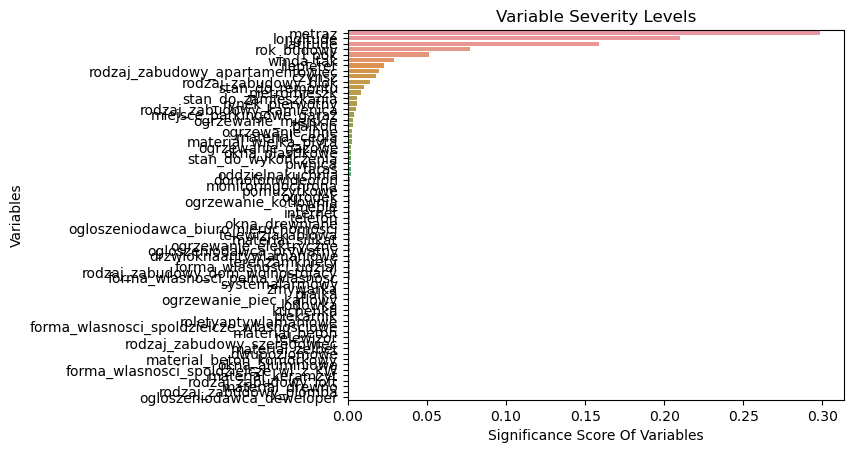

metraz                             0.298681
l_pok                              0.051465
czynsz                             0.018047
ilepieter                          0.023020
rok_budowy                         0.077208
latitude                           0.158547
longitude                          0.209702
rodzaj_zabudowy_apartamentowiec    0.019654
rodzaj_zabudowy_blok               0.013789
winda_tak                          0.029057
dtype: float64


In [7]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()
mask=pd.Series(rf_tuned.feature_importances_,index=X.columns)>0.01
sig=pd.Series(rf_tuned.feature_importances_,index=X.columns)
print(sig[mask])

## Random forest cechy ważne statystycznie

In [3]:
X_sig=X[['metraz','ilepieter','latitude','longitude']]
X_train_sig, X_test_sig, y_train, y_test = train_test_split(X_sig, y, test_size=0.20)
rf_model_sig = RandomForestRegressor(random_state = 12345)
rf_params = {"n_estimators" :[500,1000,1500,2000], 
             "max_features": [1,2,3,4], 
             "min_samples_split": [2,3,4,5,8,15],
            "max_depth": [7,15,21]}
gs_cv = GridSearchCV(rf_model_sig, 
                    rf_params,
                    n_jobs=-1,
                    verbose = 3).fit(X_train_sig, y_train)
rf_tuned_sig = RandomForestRegressor(**gs_cv.best_params_,random_state=12345).fit(X_train_sig,y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.740 total time=   6.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.621 total time=   6.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.487 total time=   6.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.699 total time=   5.9s
[CV 5/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=500;, score=0.670 total time=   5.9s
[CV 1/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=1000;, score=0.741 total time=  11.8s
[CV 2/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=1000;, score=0.619 total time=  12.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_split=2, n_estimators=1000;, score=0.488 total time=  11.7s
[CV 4/5] END max_depth=7, max

182

In [21]:
X_sig=X[['metraz','ilepieter','latitude','longitude']]
X_train_sig, X_test_sig, y_train, y_test = train_test_split(X_sig, y, test_size=0.20)
y_pred = rf_tuned_sig.predict(X_test_sig)
print ('Model evaluation:')
print ('R squared: {}'.format(r2_score(y_test, y_pred)))
print ('Variance explained : {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))

rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE: {}'.format(rmse))
cv_results = cross_val_score(rf_tuned_sig, X_test_sig, y_test, cv = 10)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(rf_tuned_sig, X_test_sig, y_test, cv = 5)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
joblib.dump(rf_tuned_sig,'rf_tuned_sig.pkl')
gc.collect()

Model evaluation:
R squared:t 0.9544288916822773
RMSE:tt 48231.619976576585
 0.778154 (0.053441)
 0.767855 (0.022725)


1522

# XGB

In [6]:
xgb = HistGradientBoostingRegressor(random_state = 12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
xgb_params = {
    "learning_rate": [0.01, 0.1,0.2,0.5,1],
    "max_depth":[7,8,9,None],
    "max_iter": [100,200,400,800,1000,1500,2000,3000,4000]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, n_jobs = 1, verbose = 4).fit(X_train, y_train)
print(xgb_cv_model.best_params_)
xgb_tuned = HistGradientBoostingRegressor(**xgb_cv_model.best_params_, random_state=12345).fit(X_train,y_train)
joblib.dump(xgb_tuned,'xgb_tuned_out_log.pkl')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.558 total time=   1.4s
[CV 2/5] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.554 total time=   1.3s
[CV 3/5] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.550 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.553 total time=   1.0s
[CV 5/5] END learning_rate=0.01, max_depth=7, max_iter=100;, score=0.558 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=7, max_iter=200;, score=0.706 total time=   1.9s
[CV 2/5] END learning_rate=0.01, max_depth=7, max_iter=200;, score=0.702 total time=   2.3s
[CV 3/5] END learning_rate=0.01, max_depth=7, max_iter=200;, score=0.699 total time=   2.3s
[CV 4/5] END learning_rate=0.01, max_depth=7, max_iter=200;, score=0.700 total time=   2.0s
[CV 5/5] END learning_rate=0.01, max_depth=7, max_iter=200;, score=0.709 total time=   1.9s
[CV 1/5] END lear

['xgb_tuned_out_log.pkl']

In [4]:
xgb_tuned=joblib.load('xgb_tuned_out_log.pkl')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=12345)
y_pred = xgb_tuned.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared: {}'.format(r2_score(np.exp(y_test), np.exp(y_pred))))
print ('Variance explained : {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))

rmse = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print ('RMSE: {}'.format(rmse))
cv_results = cross_val_score(xgb_tuned, X_test, y_test, cv = 10, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(xgb_tuned, X_test, y_test, cv = 5, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared: 0.9048330459663854
Variance explained : 0.9053306257353856
RMSE: 53890.70056888872
 0.841145 (0.014091)
 0.844303 (0.013323)


In [6]:
dic={"test":y_test,'pred':np.round(y_pred,2)}
out=pd.DataFrame(dic)
out_sort=out.loc[::100].sort_values(by='test')
out_sort_test=out_sort.test
out_sort_index=out_sort.index

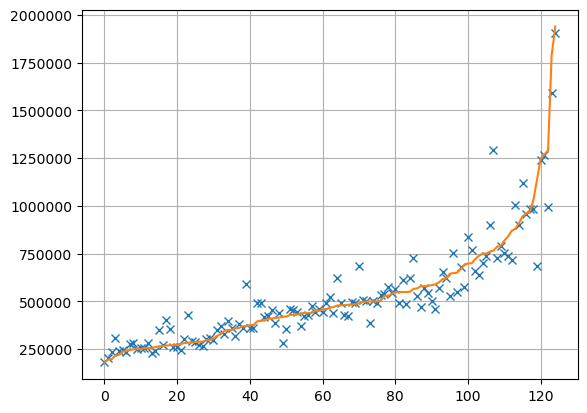

In [7]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),np.exp(out_sort.pred),'x')
plt.plot(range(len(out_sort_test)),np.exp(out_sort_test),'-')
plt.grid()


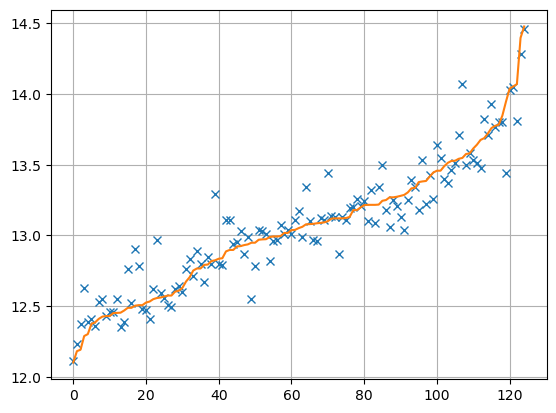

In [8]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),out_sort.pred,'x')
plt.plot(range(len(out_sort_test)),out_sort_test,'-')
plt.grid()


# BagReg

In [7]:
br = BaggingRegressor(random_state = 12345)
br_params={
    'bootstrap':[True,False],
    'bootstrap_features':[False,True],
    'max_features':[1,2,5,7,14,21,28,35,42,50,60],
    'max_samples':[1.0],#,5,10,20,50],
    'n_estimators':[400,600,800,1000]}
br_cv_model  = GridSearchCV(br, br_params, cv = 5, n_jobs = 1, verbose = 4).fit(X_train, y_train)
print(br_cv_model.best_params_)
br_tuned = BaggingRegressor(**br_cv_model.best_params_, random_state=12345).fit(X_train,y_train)
joblib.dump(br_tuned,'br_tuned_out_log.pkl')

Fitting 5 folds for each of 176 candidates, totalling 880 fits
[CV 1/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=400;, score=0.049 total time=   1.1s
[CV 2/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=400;, score=0.047 total time=   1.1s
[CV 3/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=400;, score=0.048 total time=   1.1s
[CV 4/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=400;, score=0.048 total time=   1.1s
[CV 5/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=400;, score=0.048 total time=   1.1s
[CV 1/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=600;, score=0.063 total time=   1.9s
[CV 2/5] END bootstrap=True, bootstrap_features=False, max_features=1, max_samples=1.0, n_estimators=600;, sc

['br_tuned_out_log.pkl']

In [9]:
br_tuned=joblib.load('br_tuned_out_log.pkl')

In [10]:
y_pred = br_tuned.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(np.exp(y_test), np.exp(y_pred))))
print ('Variance explained : {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))
rmse = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(br_tuned, X_test, y_test, cv = 10, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(br_tuned, X_test, y_test, cv = 5, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.8386398704405924
Variance explained : 0.8409570063052201
RMSE:tt 63850.066250939
 0.815129 (0.018330)
 0.810514 (0.015725)


In [11]:
dic={"test":y_test,'pred':np.round(y_pred,2)}
out=pd.DataFrame(dic)
out_sort=out.loc[::100].sort_values(by='test')
out_sort_test=out_sort.test
out_sort_index=out_sort.index

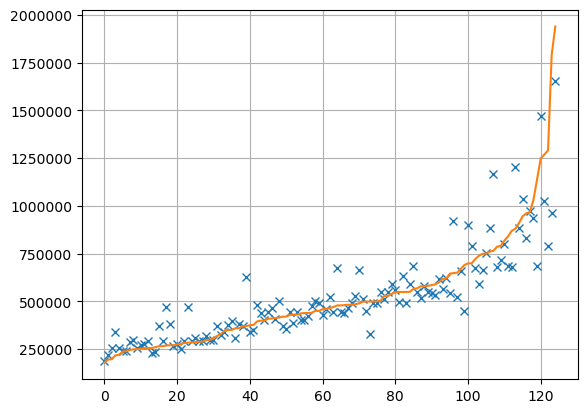

In [12]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),np.exp(out_sort.pred),'x')
plt.plot(range(len(out_sort_test)),np.exp(out_sort_test),'-')
plt.grid()


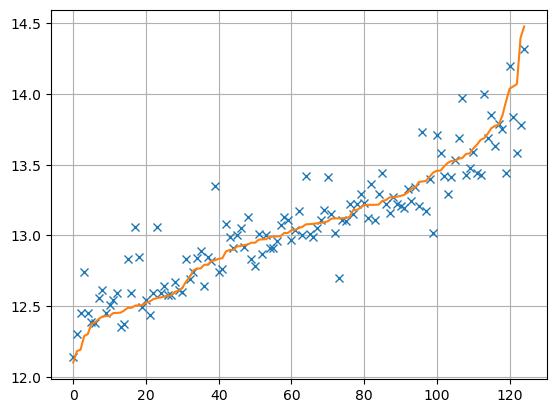

In [13]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),out_sort.pred,'x')
plt.plot(range(len(out_sort_test)),out_sort_test,'-')
plt.grid()


# voting regressor

In [7]:
from sklearn.ensemble import VotingRegressor

In [24]:
voting=VotingRegressor([('rtf',rf_tuned),('xgb',xgb_tuned),('br',br_tuned)]).fit(X_train,y_train)

In [25]:

y_pred = voting.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(y_test, y_pred)))
print ('Variance explained : {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))
cv_results = cross_val_score(voting, X_test, y_test, cv = 10, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))
cv_results = cross_val_score(voting, X_test, y_test, cv = 5, n_jobs = 1)
print(" %f (%f)" % ( cv_results.mean(), cv_results.std()))

Model evaluation:
R squared:t 0.8593621612508782
RMSE:tt 82252.28469108112
 0.779130 (0.070569)
 0.775100 (0.048510)


In [26]:
y_pred_br = br_tuned.predict(X_test)
y_pred_rf = rf_tuned.predict(X_test)
y_pred_xgb= xgb_tuned.predict(X_test)
y_pred=(y_pred_rf+y_pred_xgb+y_pred_br)/(3)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared: {}'.format(r2_score(y_test, y_pred)))
print ('Variance explained : {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))
rmse = mean_absolute_error(y_test, y_pred)
print ('RMSE:tt {}'.format(rmse))

Model evaluation:
R squared:t 0.946906084508665
RMSE:tt 53242.470986715045


# Sieć neuronowa

In [4]:
from keras.layers import Dense
from keras.models import Sequential

2023-05-24 00:27:22.814086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 00:27:24.075587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/grzegorz/anaconda3/lib/:/home/grzegorz/anaconda3/lib/:/home/grzegorz/anaconda3/envs/sklearn/lib/
2023-05-24 00:27:24.075666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/grzegorz/anaconda3/

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
x_len = len(X_train.columns)
model = Sequential([
# dense layer with 32 neurons, relu activation and x_len features
Dense(68, activation='relu', input_shape=(x_len,)),
# dense layer with 16 neurons and relu activation (constrain to 0 to 1)
#Dense(68, activation='relu'),
Dense(34, activation='relu'),
Dense(12, activation='relu'),
#Dense(69, activation='relu'),
#Dense(69, activation='relu'),
#Dense(69, activation='relu'),
#Dense(69, activation='relu'),
#Dense(69, activation='relu'),
# dense output layer with one neuron
Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mean_absolute_error')
hist = model.fit(X_train, y_train,batch_size=32, epochs=800,validation_data=(X_test, y_test))

Epoch 1/800
1561/1561 [==============================] - 4s 2ms/step - loss: 1.9737 - val_loss: 1.0169
Epoch 2/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.8834 - val_loss: 0.8837
Epoch 3/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.6978 - val_loss: 0.4349
Epoch 4/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.5322 - val_loss: 0.5929
Epoch 5/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.4754 - val_loss: 0.2980
Epoch 6/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.4081 - val_loss: 0.2970
Epoch 7/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.3773 - val_loss: 0.4367
Epoch 8/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.3622 - val_loss: 0.3153
Epoch 9/800
1561/1561 [==============================] - 3s 2ms/step - loss: 0.3505 - val_loss: 0.5746
Epoch 10/800
1561/1561 [==============================] - 3s 2ms/step - l

In [30]:
y_pred = model.predict(X_test)
# evaluate model based on the predictions
print ('Model evaluation:')
print ('R squared:t {}'.format(r2_score(np.exp(y_test), np.exp(y_pred))))
print ('Variance explained :t {}'.format(explained_variance_score(np.exp(y_test), np.exp(y_pred))))

# calculate RMSE based on unscaled value
rmse = mean_absolute_error(np.exp(y_test), np.exp(y_pred))# * (df_final['cena'].max() - df_final['cena'].min())
print ('RMSE:tt {}'.format(rmse))

391/391 [==============================] - 0s 651us/step
Model evaluation:
R squared:t 0.5204367006397868
Variance explained :t 0.5496494380639888
RMSE:tt 132399.22572436807


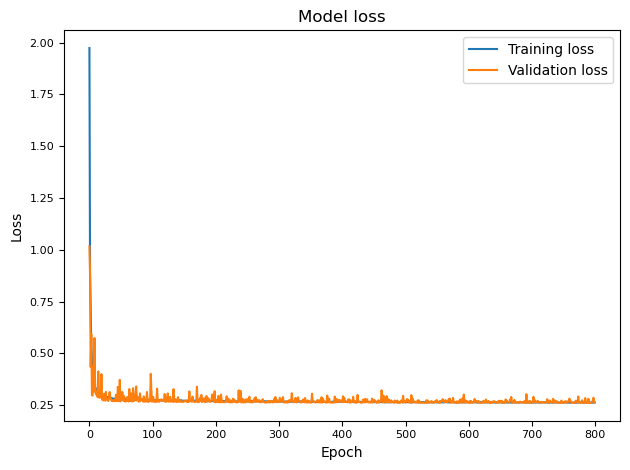

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

In [32]:
y_pred = [x[0] for x in y_pred]

In [33]:
dic={"test":y_test,'pred':np.round(y_pred,2)}
out=pd.DataFrame(dic)
out_sort=out.loc[::100].sort_values(by='test')
out_sort_test=out_sort.test
out_sort_index=out_sort.index

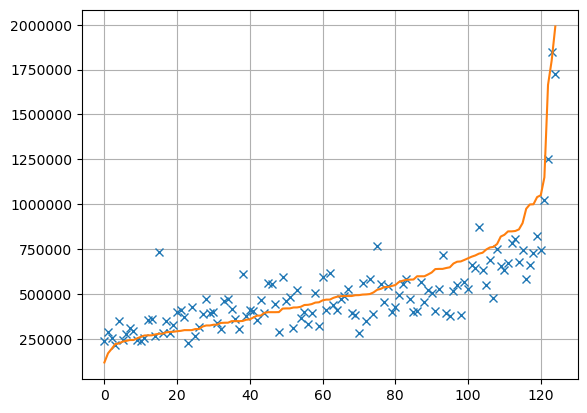

In [34]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),np.exp(out_sort.pred),'x')
plt.plot(range(len(out_sort_test)),np.exp(out_sort_test),'-')
plt.grid()


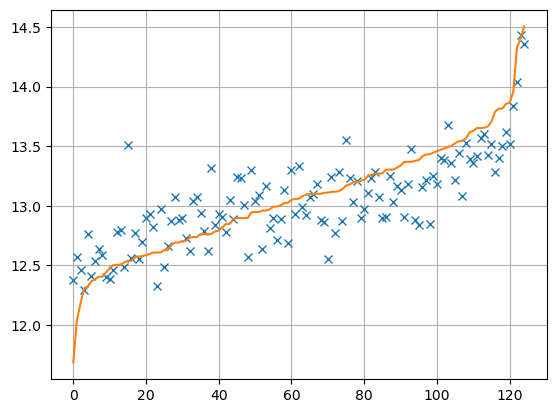

In [35]:

plt.ticklabel_format(axis='both', style='plain')
plt.plot(range(len(out_sort_test)),out_sort.pred,'x')
plt.plot(range(len(out_sort_test)),out_sort_test,'-')
plt.grid()


In [11]:
joblib.dump(model,"neural.pkl")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-05-16 20:28:32           64
variables.h5                                   2023-05-16 20:28:32       199496
config.json                                    2023-05-16 20:28:32         2239


['neural.pkl']